Q3: Is there a correlation based on symptoms vs preexisting conditions?

In [37]:
# dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from sklearn import tree
%matplotlib inline

In [2]:
import seaborn as sns

In [9]:
df = pd.read_csv('test3.csv')

In [4]:
column_names = ['Hypertension', 'Diabetes', 'Cardiovascular Disease (incl. CAD)',
                'Chronic obstructive lung (COPD)', 'Cancer (Any)', 
                'Chronic kidney/renal disease', 'Fever (temperature ≥37·3°C)', 'Respiratory rate > 24 breaths per min',
                'Cough', 'Shortness of Breath (dyspnoea)','Diarrhoea','Fatigue']
factors = pd.DataFrame(df, columns = column_names)
factors

,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),Diarrhoea,Fatigue
0,0.30,0.19,0.08,0.03,0.02,0.02,0.94,0.29,0.79,0.00,0.05,0.23
1,0.48,0.31,0.24,0.07,0.00,0.04,0.94,0.63,0.72,0.00,0.04,0.28
2,0.23,0.14,0.01,0.01,0.07,0.00,0.94,0.16,0.82,0.00,0.05,0.21
3,0.00,0.12,0.00,0.00,0.03,0.00,0.91,0.19,0.00,0.00,0.02,0.00
4,0.00,0.10,0.00,0.00,0.05,0.00,0.90,0.21,0.00,0.00,0.04,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1151,0.38,0.21,0.03,0.00,0.00,0.00,0.40,0.14,0.00,0.00,0.03,0.00
1152,0.50,0.26,0.11,0.07,0.03,0.08,0.74,0.00,0.77,0.54,0.20,0.00
1153,0.59,0.38,0.14,0.07,0.08,0.16,0.72,0.00,0.73,0.61,0.25,0.00
1154,0.68,0.43,0.13,0.06,0.06,0.12,0.73,0.00,0.72,0.74,0.21,0.00


In [25]:
factors.corr()

,Hypertension,Diabetes,Cardiovascular Disease (incl. CAD),Chronic obstructive lung (COPD),Cancer (Any),Chronic kidney/renal disease,Fever (temperature ≥37·3°C),Respiratory rate > 24 breaths per min,Cough,Shortness of Breath (dyspnoea),Diarrhoea,Fatigue
Hypertension,1.000000,0.292915,0.274046,0.202283,0.266980,0.165803,0.093521,-0.025996,0.067037,0.323839,-0.046225,0.230585
Diabetes,0.292915,1.000000,0.300586,0.563199,0.136545,0.365209,-0.073928,0.081773,-0.035895,0.240816,-0.137125,0.081284
Cardiovascular Disease (incl. CAD),0.274046,0.300586,1.000000,0.390948,0.069669,0.273515,0.018035,0.147144,-0.148478,0.101614,-0.022982,-0.097235
Chronic obstructive lung (COPD),0.202283,0.563199,0.390948,1.000000,0.095926,0.532321,-0.163458,-0.018365,-0.110037,0.301502,-0.134326,0.006628
Cancer (Any),0.266980,0.136545,0.069669,0.095926,1.000000,0.036606,0.077953,-0.048222,0.058520,0.172261,-0.015936,0.138569
Chronic kidney/renal disease,0.165803,0.365209,0.273515,0.532321,0.036606,1.000000,0.018587,0.009147,0.026953,0.243567,-0.090509,-0.062987
Fever (temperature ≥37·3°C),0.093521,-0.073928,0.018035,-0.163458,0.077953,0.018587,1.000000,0.023465,0.427583,0.057471,0.162549,0.356256
Respiratory rate > 24 breaths per min,-0.025996,0.081773,0.147144,-0.018365,-0.048222,0.009147,0.023465,1.000000,-0.012607,0.021400,0.050813,-0.034245
Cough,0.067037,-0.035895,-0.148478,-0.110037,0.058520,0.026953,0.427583,-0.012607,1.000000,0.259082,0.384818,0.355060
Shortness of Breath (dyspnoea),0.323839,0.240816,0.101614,0.301502,0.172261,0.243567,0.057471,0.021400,0.259082,1.000000,0.033239,0.036101


In [41]:
corr = factors.corr()

<AxesSubplot:>

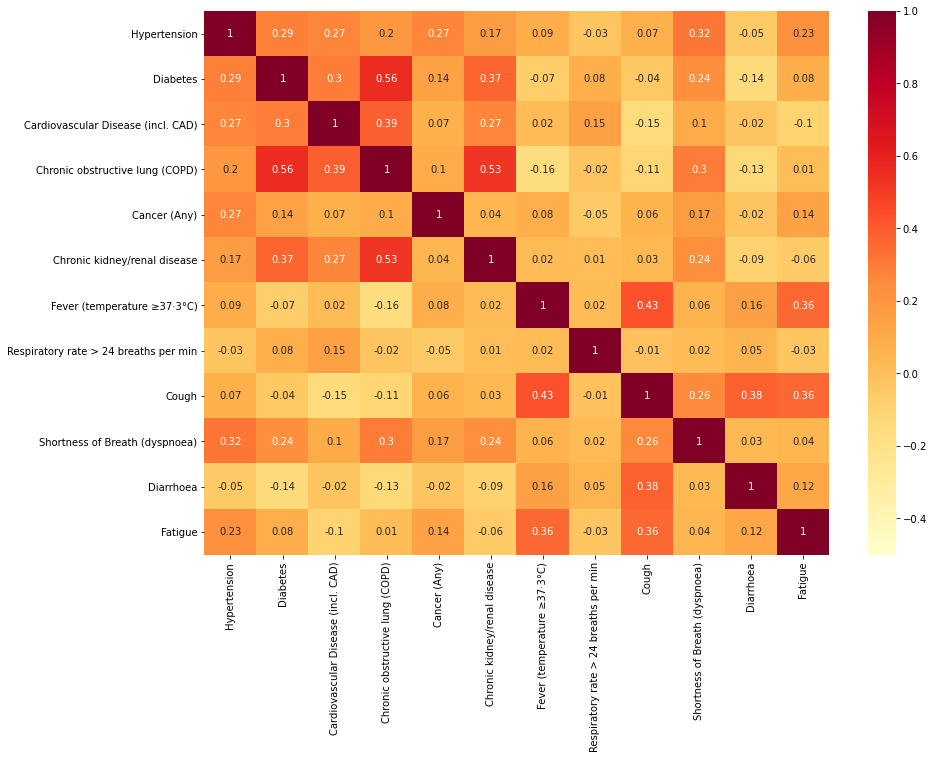

In [46]:
fig, ax = plt.subplots(figsize=(14,10)) 

corr=corr.round(2)
sns.heatmap(corr, annot=True, vmin=-0.5, cmap="YlOrRd")
# fig.title()

Text(0.5, 1.0, 'Correlation Between Underlying Conditions and Symptoms')

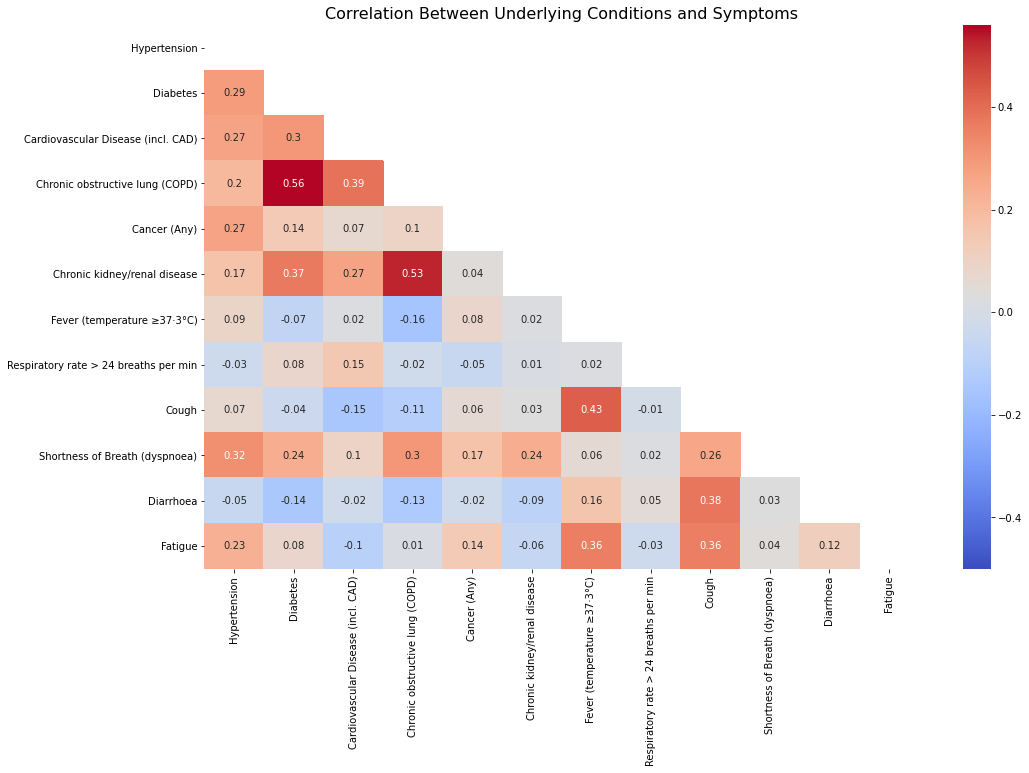

In [59]:
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(factors.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr, mask=mask, annot=True, vmin=-0.5, cmap="coolwarm")
heatmap.set_title('Correlation Between Underlying Conditions and Symptoms',fontdict={'fontsize':16})